# Support Vector Machines on the ionosphere dataset
#### Mario Martin

We used this dataset in the Meta-methods notebook, so open it in another window to compare results with other methods.

In [1]:
import numpy as np                     # Llibreria matemÃ tica
import matplotlib.pyplot as plt        # Per mostrar plots
import sklearn                         # Llibreia de DM
import sklearn.datasets as ds            # Per carregar mÃ©s facilment el dataset digits
import sklearn.model_selection as cv    # Pel Cross-validation
import sklearn.neighbors as nb           # Per fer servir el knn
from sklearn.model_selection import cross_val_score  
%matplotlib inline              

In [2]:
import numpy as np    # Numeric and matrix computation
import pandas as pd   # Optional: good package for manipulating data 
import sklearn as sk  # Package with learning algorithms implemented

# Loading the dataset.
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data"
df = pd.read_csv(url,header =None)

y=df[34].values
X=df.values[:,0:34].astype('float32')


Let's separate the data into training (for adjusting parameters), and validation. 

In [3]:
(X_train, X_test,  y_train, y_test) = cv.train_test_split(X, y, test_size=.3, stratify = y,random_state=1)

Notice the stratification according to labels *y* that we demand in the spliting of data. The ionosphere dataset is small and with strarification we ensure we obtain the same proportion of examples of each class in training and test sets.

**Remember**. Data should be numerical and normalized or standarized before using an SVM. 

Normalization is not strictily necessary in our dataset because almost all columns are in range -1..1 (except columns 0 and 1)

In [4]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,...,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,...,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,...,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,...,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,...,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


However, let's see how to do that properly:

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#scaler = StandardScaler().fit(X_train)
scaler = MinMaxScaler(feature_range=(-1, 1)).fit(X_train)

# Apply the normalization trained in training data in both training and test sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Linear SVM

Let's try an SVM with default parameters. Linear means that we are not using any kernel to move the data to a higher dimensional space.

In [6]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

#knc = LinearSVC() 
knc = SVC(kernel='linear')
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("Confusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nAccuracy on test set: ",sklearn.metrics.accuracy_score(y_test, pred))


Confusion matrix on test set:
 [[27 11]
 [ 2 66]]

Accuracy on test set:  0.8773584905660378


Not bad results. However, the linear SVM has parameter C that has to be adjusted. We will use *GridSearch* method to find the optimal value of C like we did in a previous notebook with the k value of the KNN algorithm.  

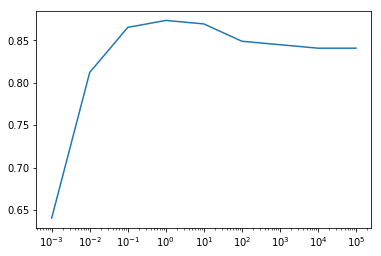

Acc. 10-fold cross on train data=  0.8744420289855073

Confusion matrix on test set:
 [[27 11]
 [ 2 66]]

Accuracy on test set:  0.8773584905660378

Best value of parameter C found:  {'C': 1.0}

Number of supports:  72 ( 49 of them have slacks)
Prop. of supports:  0.2938775510204082


In [7]:
# List of C values to test. We usualy test diverse orders of magnitude
#Cs = np.logspace(-3, 11, num=15, base=10.0)
Cs = np.logspace(-3, 5, num=9, base=10.0)

param_grid = {'C': Cs}
#grid_search = GridSearchCV(LinearSVC(), param_grid, cv=10)
grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=10)
grid_search.fit(X_train,y_train)

# Let's plot the 10-fold cross.validation accuracy deppending on C
scores = grid_search.cv_results_['mean_test_score']
plt.semilogx(Cs,scores)
plt.show()

parval=grid_search.best_params_
cvacc = cross_val_score(SVC(C=parval['C'],kernel='linear'), X=X_train,  y=y_train, cv=10, scoring='accuracy')
print('Acc. 10-fold cross on train data= ', cvacc.mean())


# Let's apply the best C parameter found to the test set

#knc = LinearSVC(C=parval['C']) 
knc = SVC(C=parval['C'],kernel='linear')
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("\nConfusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nAccuracy on test set: ",sklearn.metrics.accuracy_score(y_test, pred))
print("\nBest value of parameter C found: ",parval)
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==parval['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/X_train.shape[0])


On this dataset, the best C for a linear SVM is 1 (that casually is also the default value for parameter C) so we don't obtain any improvement tuning the C parameter. However, in other datasets we could obtain a dramatic increase of accuracy. 

Let's see (just for fun) how the C parameter affects performance on training and test sets. 

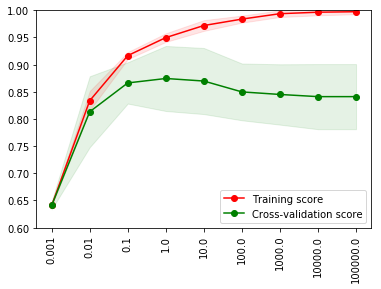

In [8]:
from sklearn.model_selection import validation_curve

def plot_validation_curve(parameter_values, train_scores, validation_scores):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    plt.fill_between(parameter_values, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(parameter_values, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
    plt.plot(parameter_values, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(parameter_values, validation_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.ylim(validation_scores_mean.min() - .1, train_scores_mean.max() + .1)
    plt.legend(loc=4)


training_scores, test_scores = validation_curve(SVC(kernel='linear'), X_train, y_train, param_name="C", param_range=Cs,cv=10)
plot_validation_curve(range(len(Cs)), training_scores, test_scores)
plt.xticks(range(len(Cs)), Cs,rotation='vertical');
plt.ylim([0.6, 1])
plt.show()

Notice that from value of C=1, increasing C results in better accuracy on the training set but worse performance on the test set. This is because being too demanding on the separation of data in the training dataset, we are overfitting to it and we decrease performance in the test set. A nice picture of typical overfitting.

## Polynomial kernels

We have seen that performance with a linear SVM is Ok but not competitive with Metamethods. However, it could happen that using kernels we could even improve accuracy. We'll try first ploynomial kernel with degree 2 with default parameters.

In [9]:
knc = SVC(kernel='poly',degree =2) 
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("Confusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nAccuracy on test set: ",sklearn.metrics.accuracy_score(y_test, pred))


Confusion matrix on test set:
 [[29  9]
 [ 0 68]]

Accuracy on test set:  0.9150943396226415


Better performance than the obtained with a linear SVM... It could even be increased because we didn't tune the C parameter for the polynomial kernel. Let's do that now.

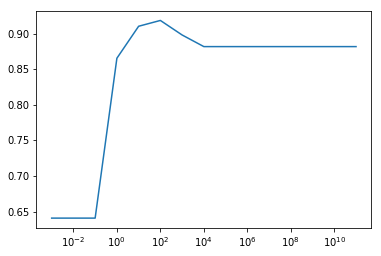

Acc. 10-fold cross on train data=  0.9189710144927539

Confusion matrix on test set:
 [[31  7]
 [ 0 68]]

Accuracy on test set:  0.9339622641509434

Best combination of parameters found:  {'C': 100.0}

Number of supports:  71 ( 19 of them have slacks)
Prop. of supports:  0.2897959183673469


In [10]:
Cs = np.logspace(-3, 11, num=15, base=10.0)

param_grid = {'C': Cs}
grid_search = GridSearchCV(SVC(kernel='poly',degree =2) , param_grid, cv=10)
grid_search.fit(X_train,y_train)

scores = grid_search.cv_results_['mean_test_score']

plt.semilogx(Cs,scores)
plt.show()

parval=grid_search.best_params_

cvacc = cross_val_score(SVC(kernel='poly',degree =2,C=parval['C']) , X=X_train,  y=y_train, cv=10, scoring='accuracy')
print('Acc. 10-fold cross on train data= ', cvacc.mean())


knc = SVC(kernel='poly',degree =2,C=parval['C']) 
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("\nConfusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nAccuracy on test set: ",sklearn.metrics.accuracy_score(y_test, pred))
print("\nBest combination of parameters found: ",parval)
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==parval['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/X_train.shape[0])

Best result so far. Competitive with meta-methods. Now the best C value found is 100 and accuracy is a lot higher than with default parameters. It's always important when working with SVMs to find best parameters. 

For this C value we have a nice accuracy on the test set. Let's try what happens now with a polynomial kernel of degree 3.

In [11]:
knc = SVC(kernel='poly',degree =3) 
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("Confusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nAccuracy on test set: ",sklearn.metrics.accuracy_score(y_test, pred))


Confusion matrix on test set:
 [[ 1 37]
 [ 0 68]]

Accuracy on test set:  0.6509433962264151


Very bad results! That's because, again, we didn't use the optimal value for the C parameter but the default one. Let's find the best parameter.

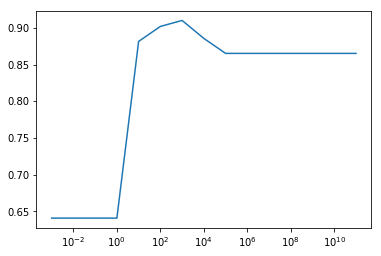

Acc. 10-fold cross on train data=  0.9106231884057971

Confusion matrix on test set:
 [[31  7]
 [ 1 67]]

Best combination of parameters found:  {'C': 1000.0}

Accuracy on test set:  0.9245283018867925

Number of supports:  65 ( 13 of them have slacks)
Prop. of supports:  0.2653061224489796


In [12]:
Cs = np.logspace(-3, 11, num=15, base=10.0)

param_grid = {'C': Cs}
grid_search = GridSearchCV(SVC(kernel='poly',degree =3) , param_grid, cv=10)
grid_search.fit(X_train,y_train)

scores = grid_search.cv_results_['mean_test_score']

plt.semilogx(Cs,scores)
plt.show()

parval=grid_search.best_params_

cvacc = cross_val_score(SVC(kernel='poly',degree =3,C=parval['C']) , X=X_train,  y=y_train, cv=10, scoring='accuracy')
print('Acc. 10-fold cross on train data= ', cvacc.mean())

knc = SVC(kernel='poly',degree =3,C=parval['C']) 
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("\nConfusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nBest combination of parameters found: ",parval)
print("\nAccuracy on test set: ",sklearn.metrics.accuracy_score(y_test, pred))
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==parval['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/X_train.shape[0])

Confusion matrix shows only 1 more error than the confusion matrix obtained with the quadratic kernel. Given the low number of cases we have in the test set, we cannot conclude that polynomial kernel with degree 2 is better than with degree 3. But remember that when there are several classifiers with a similar performance, we should always choose the simpler one! So we will choose the quadratic polynomial kernel as best polynomial kernel, not because of performance only but because is the better combination of performance and simplicity.

## RBF Kernel

There's another possibility for the kernel: The RBF kernel. This is the default kernel in the implementation of SVMs in sklearn, so we don't need to explicitely say the kernel used. Let's try it with default parameters.

In [14]:
knc = SVC() 
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("Confusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nAccuracy on test set: ",sklearn.metrics.accuracy_score(y_test, pred))


Confusion matrix on test set:
 [[30  8]
 [ 0 68]]

Accuracy on test set:  0.9245283018867925


Promising performance for default parameters. But we have to search for the best parameters. In this case we have two parameters to adjust: the C parameter and the gamma parameter. We will find the best combination using the *GridSearch* method.

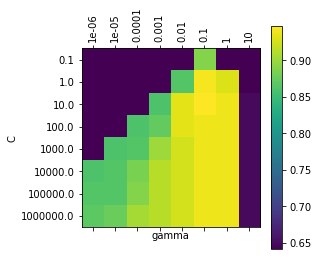


Best combination of parameters found:  {'C': 10.0, 'gamma': 0.1}

Acc. 10-fold cross on train data=  0.9469710144927538


In [15]:
# Values we will test for each parameter. When observin results, consider the limits of the 
# values tested and increase them if necessary 
gammas = [0.000001,0.00001, 0.0001,0.001,0.01,0.1,1,10]
Cs = np.logspace(-1, 6, num=8, base=10.0)

param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(SVC(), param_grid, cv=10)
grid_search.fit(X_train,y_train)
parval=grid_search.best_params_

# We'll show in a grid, the accuracy for each combination of parameters tester
scores = grid_search.cv_results_['mean_test_score']
scores = np.array(scores).reshape(len(param_grid['C']), len(param_grid['gamma']))

plt.matshow(scores)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(param_grid['gamma'])), param_grid['gamma'],rotation='vertical')
plt.yticks(np.arange(len(param_grid['C'])), param_grid['C'])
plt.show()
parval=grid_search.best_params_
print("\nBest combination of parameters found: ",parval)


cvacc = cross_val_score(SVC(C=parval['C'], gamma=parval['gamma']) , X=X_train,  y=y_train, cv=10, scoring='accuracy')
print('\nAcc. 10-fold cross on train data= ', cvacc.mean())


This picture show for each combination of parameters the accuracy obtained in a 10-fold cross-validation. Notice the relation between C and gamma. 

Let's see the performance of the best parameters found on the test set.

In [16]:
# Let's apply the best combination of parameters found to the test set

knc = SVC(C=parval['C'], gamma=parval['gamma']) 
knc.fit(X_train, y_train)
pred=knc.predict(X_test)

print("Confusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nAccuracy on test set: ",sklearn.metrics.accuracy_score(y_test, pred))
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==parval['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/X_train.shape[0])

Confusion matrix on test set:
 [[34  4]
 [ 0 68]]

Accuracy on test set:  0.9622641509433962

Number of supports:  61 ( 9 of them have slacks)
Prop. of supports:  0.24897959183673468


Wow. Best performance obtained so far using any method, even better than results obtained with meta-methods. 

**Observations about number and percentage of supports vectors:** 
It is know that percentage of supports of an SVM is a lower bound for the leave-one-out error. In general, an SVM with a lot of supports will be an overfitted SVM. A percentage of supports higher than 50% should be considered suspicious. If this happens, try to use other kernels. As a rule of thumb, a good SVM has a percentatge of supports vectors about 20-40% of the data (but that depends on a lot of things).

In our case all SVM have a low number of supports. And notice that the machine with a higher performance is the one with a lower number of supports (24.9%). That's not a coincidence but something common in SVMs.

## Appendix: Performance of meta-methods

In [17]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score

clf=ExtraTreesClassifier(n_estimators=200,random_state=1).fit(X_train, y_train)
pred=clf.predict(X_test)
print("Confusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nAccuracy on test set: ",sklearn.metrics.accuracy_score(y_test, pred))
   

Confusion matrix on test set:
 [[34  4]
 [ 1 67]]

Accuracy on test set:  0.9528301886792453


In [18]:
from sklearn.ensemble import AdaBoostClassifier

clf=AdaBoostClassifier(n_estimators=200,random_state=1).fit(X_train, y_train)
pred=clf.predict(X_test)
print("Confusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nAccuracy on test set: ",sklearn.metrics.accuracy_score(y_test, pred))


Confusion matrix on test set:
 [[34  4]
 [ 2 66]]

Accuracy on test set:  0.9433962264150944


In [19]:
from sklearn.ensemble import BaggingClassifier

clf=BaggingClassifier(n_estimators=200,max_features=0.35,random_state=1).fit(X_train, y_train)
pred=clf.predict(X_test)
print("Confusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nAccuracy on test set: ",sklearn.metrics.accuracy_score(y_test, pred))


Confusion matrix on test set:
 [[34  4]
 [ 2 66]]

Accuracy on test set:  0.9433962264150944
